In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df20 = pd.read_csv('Graduate_Data_2019_20.csv', skiprows=14)
df21 = pd.read_csv('Graduate_Data_2020_21.csv', skiprows=14)
df22 = pd.read_csv('Graduate_Data_2021_22.csv', skiprows=14)
# data source: https://www.hesa.ac.uk/data-and-analysis/graduates/table-30.zip

In [2]:
#raw data
df20.head()

,Subject area of degree,Country of provider,Provider type,Level of qualification obtained,Mode of former study,Skill group,Work population marker,Salary band,Academic year,Number,Percent
0,01 Medicine and dentistry,All,All,All,All,All,Paid employment is an activity,"Less than £15,000",2019/20,5,0%
1,01 Medicine and dentistry,All,All,All postgraduate,All,All,Paid employment is an activity,"Less than £15,000",2019/20,5,0%
2,01 Medicine and dentistry,All,All,All undergraduate,All,All,Paid employment is an activity,"Less than £15,000",2019/20,0,0%
3,01 Medicine and dentistry,All,All,First degree,All,All,Paid employment is an activity,"Less than £15,000",2019/20,0,0%
4,01 Medicine and dentistry,All,All,Other undergraduate,All,All,Paid employment is an activity,"Less than £15,000",2019/20,0,0%


In [3]:
#CLEANING

# Removing unwanted characters and spaces from 'Subject area of degree' Column
# Defining a list of characters for removal
subject_numbers = ['01 ','02 ','03 ','04 ','05 ','06 ','07 ','08 ','09 ','10 ','11 ','12 ','13 ','14 ','15 ','16 ','17 ','18 ','19 ','20 ','21 ','22 ','23 ','24 ','25 ','26 ',' CAH level 1']
# Create a regex pattern that matches any of the strings to remove (using 'OR')
subject_pattern = '|'.join(subject_numbers)
# Apply to the series of each database
df20['Subject area of degree'] = df20['Subject area of degree'].str.replace(subject_pattern, '', regex=True)
df21['Subject area of degree'] = df21['Subject area of degree'].str.replace(subject_pattern, '', regex=True)
df22['Subject area of degree'] = df22['Subject area of degree'].str.replace(subject_pattern, '', regex=True)

#code for changing Percent column into integer
#df20 = df20[df20['Percent']
#df20 = df20[df20['Percent'].str.rstrip('%',).astype('int')]



In [4]:
#Concatinating our 3 datasets for use comparing academic years with each other
df = pd.concat([df20, df21, df22], ignore_index=True)

#Renaming certain subject areas for later visualisation
df['Subject area of degree'] = df['Subject area of degree'].replace({'Geography, earth and environmental studies (natural sciences)': 'Geo-environmental natural sciences',
                                                                     'Geography, earth and environmental studies (social sciences)': 'Geo-environmental social sciences',
                                                                     'Media, journalism and communications':'Media & communications',
                                                                     'Design, and creative and performing arts' :'Design, creative & performing arts',
                                                                     'Historical, philosophical and religious studies':'History, philosophy & religious studies',
                                                                     'Agriculture, food and related studies':'Agriculture & food studies',})

df['Subject area of degree'] = df['Subject area of degree'].str.replace('and', '&')

#our combined data contains almost 2 million rows - initial exploration will filter out the majority of unwanted rows relative to what we want to explore

In [5]:
#Total graduate numbers year on year

dftotal = df.copy()
dftotal = df[(df['Salary band']== 'Total') &(df['Subject area of degree']== 'Total') & (df['Country of provider'] == 'All') & (df['Provider type'] == 'All') & (df['Level of qualification obtained'] == 'All') & (df['Mode of former study'] == 'All') & (df['Skill group'] == 'All')]
dftotal = dftotal.drop(['Country of provider', 'Provider type', 'Level of qualification obtained', 'Mode of former study', 'Skill group','Percent'], axis=1)
dftotal = dftotal.groupby('Academic year').sum('Number')
#Adding new column for % increase year on year
dftotal['Percentage Increase'] = dftotal['Number'].pct_change() * 100
dftotal

,Number,Percentage Increase
Academic year,,
2019/20,306055,NaN
2020/21,335695,9.684534
2021/22,345350,2.876123


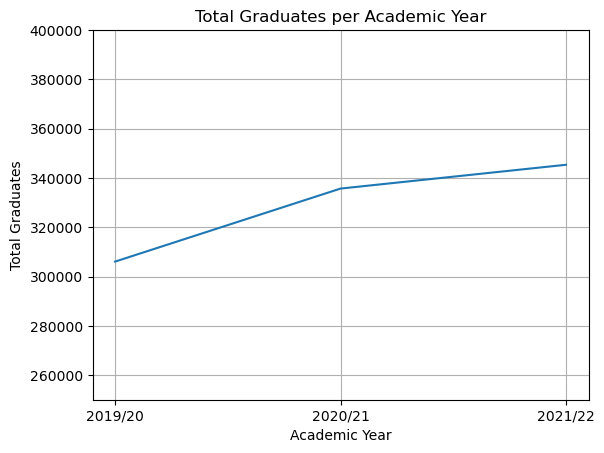

In [6]:
# Plotting line graph for Total Graduates per Academic Year

plt.plot(dftotal)
plt.title('Total Graduates per Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Total Graduates')
plt.ylim(bottom=250000,top=400000)
plt.grid(True)
plt.show()

In [7]:
#Viewing individual subject areas 
df['Subject area of degree'].unique()

array(['Medicine & dentistry', 'Subjects allied to medicine',
       'Biological & sport sciences', 'Psychology', 'Veterinary sciences',
       'Agriculture & food studies', 'Physical sciences',
       'Mathematical sciences', 'Engineering & technology', 'Computing',
       'Architecture, building & planning', 'Social sciences', 'Law',
       'Business & management', 'Language & area studies',
       'History, philosophy & religious studies', 'Education & teaching',
       'Combined & general studies', 'Media & communications',
       'Design, creative & performing arts',
       'Geo-environmental natural sciences',
       'Geo-environmental social sciences', 'Total', 'Total non-science',
       'Total science'], dtype=object)

In [8]:
#filtering subject areas by academic year and total number of graduates
dftotalsubject = df.copy()
dftotalsubject = df[(df['Salary band']== 'Total') & (df['Country of provider'] == 'All') & (df['Provider type'] == 'All') & (df['Level of qualification obtained'] == 'All') & (df['Mode of former study'] == 'All') & (df['Skill group'] == 'All') & (df['Subject area of degree'] != 'Total') & (df['Subject area of degree'] != 'Total science') & (df['Subject area of degree'] != 'Total non-science') ]
dftotalsubject = dftotalsubject.drop(['Country of provider', 'Provider type', 'Level of qualification obtained', 'Mode of former study', 'Skill group','Percent'], axis=1)



#finding the top 5 most popular subject areas per academic year

#2020
dftotalsubject2020 = dftotalsubject.copy()
dftotalsubject2020 = dftotalsubject[dftotalsubject['Academic year']=='2019/20']
dftotalsubject2020 = dftotalsubject2020.groupby(['Subject area of degree','Academic year']).sum('Number')
dftotalsubject2020 = dftotalsubject2020.sort_values(by='Number', ascending=False)
dftotalsubject2020 = dftotalsubject2020.head()

dftotalsubject2020

,,Number
Subject area of degree,Academic year,
Subjects allied to medicine,2019/20,45615
Business & management,2019/20,36580
Education & teaching,2019/20,31700
Social sciences,2019/20,31050
Engineering & technology,2019/20,21915


In [9]:
#2021
dftotalsubject2021 = dftotalsubject.copy()
dftotalsubject2021 = dftotalsubject[dftotalsubject['Academic year']=='2020/21']
dftotalsubject2021 = dftotalsubject2021.groupby(['Subject area of degree','Academic year']).sum('Number')
dftotalsubject2021 = dftotalsubject2021.sort_values(by='Number', ascending=False)
dftotalsubject2021 = dftotalsubject2021.head()

dftotalsubject2021

,,Number
Subject area of degree,Academic year,
Subjects allied to medicine,2020/21,45005
Business & management,2020/21,42400
Education & teaching,2020/21,37465
Social sciences,2020/21,34125
Engineering & technology,2020/21,24090


In [10]:
#2022
dftotalsubject2022 = dftotalsubject.copy()
dftotalsubject2022 = dftotalsubject[dftotalsubject['Academic year']=='2021/22']
dftotalsubject2022 = dftotalsubject2022.groupby(['Subject area of degree','Academic year']).sum('Number')
dftotalsubject2022 = dftotalsubject2022.sort_values(by='Number', ascending=False)
dftotalsubject2022 = dftotalsubject2022.head()
dftotalsubject2022

,,Number
Subject area of degree,Academic year,
Subjects allied to medicine,2021/22,49445
Business & management,2021/22,43410
Social sciences,2021/22,35960
Education & teaching,2021/22,35580
Engineering & technology,2021/22,24695


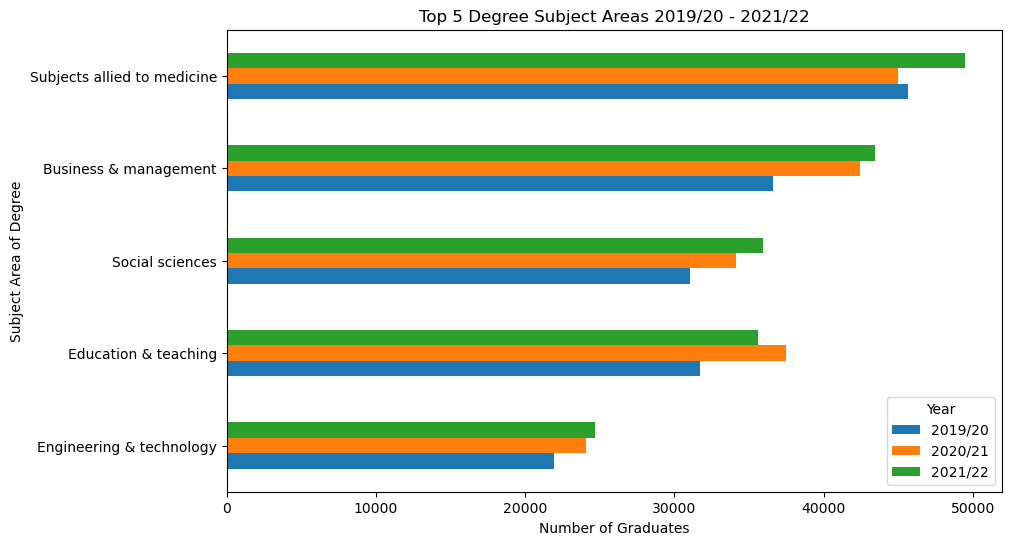

In [11]:
#As all 5 subjects are the same in each top 5, we can plot these as a grouped bar chart

combined_totalsubject = pd.concat([dftotalsubject2020, dftotalsubject2021, dftotalsubject2022])
#resetting index to employ pivot table for specific chart
combined_totalsubject = combined_totalsubject.reset_index()
pivot_totalsubject = combined_totalsubject.pivot(index='Subject area of degree', columns='Academic year', values='Number')
pivot_totalsubject = pivot_totalsubject.sort_values(by='2021/22', ascending=True) 
# Plotting as a grouped bar chart
pivot_totalsubject.plot(kind='barh', figsize=(10, 6))
plt.title('Top 5 Degree Subject Areas 2019/20 - 2021/22')
plt.xlabel('Number of Graduates')
plt.ylabel('Subject Area of Degree')
plt.legend(title='Year')
plt.show()

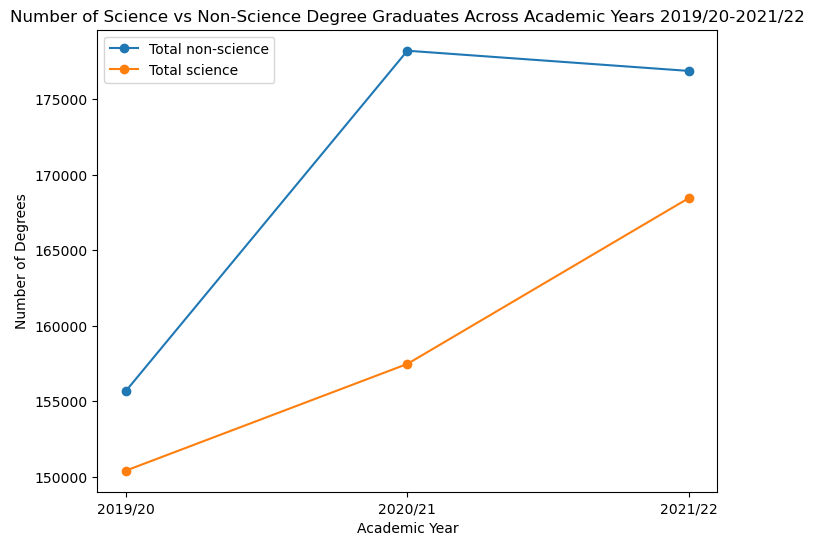

In [12]:
#Filtering to compare science and non-science total graduates

dfsciences = df.copy()
dfsciences = df[(df['Country of provider'] == 'All') & (df['Provider type'] == 'All') & (df['Level of qualification obtained'] == 'All') & (df['Mode of former study'] == 'All') & (df['Skill group'] == 'All')]
dfsciences = dfsciences.drop(['Country of provider', 'Provider type', 'Level of qualification obtained', 'Mode of former study', 'Skill group','Percent'], axis=1)
dfsciences = dfsciences[(dfsciences['Subject area of degree'] =='Total non-science') | (dfsciences['Subject area of degree'] =='Total science')]
dfsciences = dfsciences[dfsciences['Salary band'] =='Total']
dfsciences = dfsciences.groupby(['Subject area of degree', 'Academic year'], as_index=False).sum('Number')
#plot data into line graph

dfsciences_graph = dfsciences.pivot(index='Academic year', columns='Subject area of degree', values='Number')
plt.figure(figsize=(8, 6))
plt.plot(dfsciences_graph.index, dfsciences_graph['Total non-science'], label='Total non-science', marker='o')
plt.plot(dfsciences_graph.index, dfsciences_graph['Total science'], label='Total science', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Number of Degrees')
plt.title('Number of Science vs Non-Science Degree Graduates Across Academic Years 2019/20-2021/22')
plt.legend()
plt.show()

In [13]:
#Viewing individual subject areas 
df['Subject area of degree'].unique()

array(['Medicine & dentistry', 'Subjects allied to medicine',
       'Biological & sport sciences', 'Psychology', 'Veterinary sciences',
       'Agriculture & food studies', 'Physical sciences',
       'Mathematical sciences', 'Engineering & technology', 'Computing',
       'Architecture, building & planning', 'Social sciences', 'Law',
       'Business & management', 'Language & area studies',
       'History, philosophy & religious studies', 'Education & teaching',
       'Combined & general studies', 'Media & communications',
       'Design, creative & performing arts',
       'Geo-environmental natural sciences',
       'Geo-environmental social sciences', 'Total', 'Total non-science',
       'Total science'], dtype=object)

In [14]:
#df20subject['Percent'] = df20subject['Percent'].str.rstrip('%').astype('int')
#df20subject.head()

In [15]:
dfsubject = df.copy()


dfsubject = df[(df['Country of provider'] == 'All') & (df['Provider type'] == 'All') & (df['Level of qualification obtained'] == 'All') & (df['Mode of former study'] == 'All') & (df['Skill group'] == 'All')]
dfsubject = dfsubject.drop(['Country of provider', 'Provider type', 'Level of qualification obtained', 'Mode of former study', 'Skill group','Number'], axis=1)
dfsubject = dfsubject[(dfsubject['Subject area of degree'] !='Total') & (dfsubject['Subject area of degree'] !='Total non-science')& (dfsubject['Subject area of degree'] !='Total science') & (dfsubject['Salary band'] !='Total')]

#Removing duplicated percentages in Work population marker

dfsubject = dfsubject[dfsubject['Work population marker'] != 'Paid employment is most important activity']
dfsubject = dfsubject.drop('Work population marker', axis=1)

#code for changing Percent column into integer
dfsubject['Percent'] = dfsubject['Percent'].str.rstrip('%').astype('int')

dfsubject = dfsubject.groupby(['Subject area of degree','Academic year','Salary band']).sum('Percent')
dfsubject = dfsubject.reset_index()
dfsubject


,Subject area of degree,Academic year,Salary band,Percent
0,Agriculture & food studies,2019/20,"Less than £15,000",5
1,Agriculture & food studies,2019/20,"£15,000 - £17,999",8
2,Agriculture & food studies,2019/20,"£18,000 - £20,999",19
3,Agriculture & food studies,2019/20,"£21,000 - £23,999",18
4,Agriculture & food studies,2019/20,"£24,000 - £26,999",21
...,...,...,...,...
919,Veterinary sciences,2021/22,"£39,000 - £41,999",6
920,Veterinary sciences,2021/22,"£42,000 - £44,999",3
921,Veterinary sciences,2021/22,"£45,000 - £47,999",2
922,Veterinary sciences,2021/22,"£48,000 - £50,999",1


In [16]:
dfsubject['Salary band'].unique()

array(['Less than £15,000', '£15,000 - £17,999', '£18,000 - £20,999',
       '£21,000 - £23,999', '£24,000 - £26,999', '£27,000 - £29,999',
       '£30,000 - £32,999', '£33,000 - £35,999', '£36,000 - £38,999',
       '£39,000 - £41,999', '£42,000 - £44,999', '£45,000 - £47,999',
       '£48,000 - £50,999', '£51,000+'], dtype=object)

In [17]:
# Converting salary band to quantifiable figures for analysis using mapping
# New integer figures based on approximate midpoint for salary band
# As the salary bands are relatively tight, this midpoint will be able to represent an approximate salary
salary_mapping = {'Less than £15,000':13500, '£15,000 - £17,999':16500,
       '£18,000 - £20,999':19500, '£21,000 - £23,999':22500, '£24,000 - £26,999':25500,
       '£27,000 - £29,999':28500, '£30,000 - £32,999':31500, '£33,000 - £35,999':34500,
       '£36,000 - £38,999':37500, '£39,000 - £41,999':40500, '£42,000 - £44,999':43500,
       '£45,000 - £47,999':46500, '£48,000 - £50,999':49500, '£51,000+':52500}

dfsubject['Salary (approx)'] = dfsubject['Salary band'].replace(salary_mapping)

#Adding column to determine mean salary across each subject

dfsubject['Average Salary'] = dfsubject['Salary (approx)'] * dfsubject['Percent']
df_averagesalary = dfsubject.groupby(['Subject area of degree', 'Academic year']).sum('Average Salary')
df_averagesalary = df_averagesalary.drop(['Percent','Salary (approx)'], axis=1)
df_averagesalary = df_averagesalary.reset_index()
df_averagesalary['Average Salary'] = df_averagesalary['Average Salary'] / 100
df_averagesalary

,Subject area of degree,Academic year,Average Salary
0,Agriculture & food studies,2019/20,24990.0
1,Agriculture & food studies,2020/21,25410.0
2,Agriculture & food studies,2021/22,27630.0
3,"Architecture, building & planning",2019/20,31065.0
4,"Architecture, building & planning",2020/21,31485.0
...,...,...,...
61,Subjects allied to medicine,2020/21,30645.0
62,Subjects allied to medicine,2021/22,31875.0
63,Veterinary sciences,2019/20,29565.0
64,Veterinary sciences,2020/21,31995.0


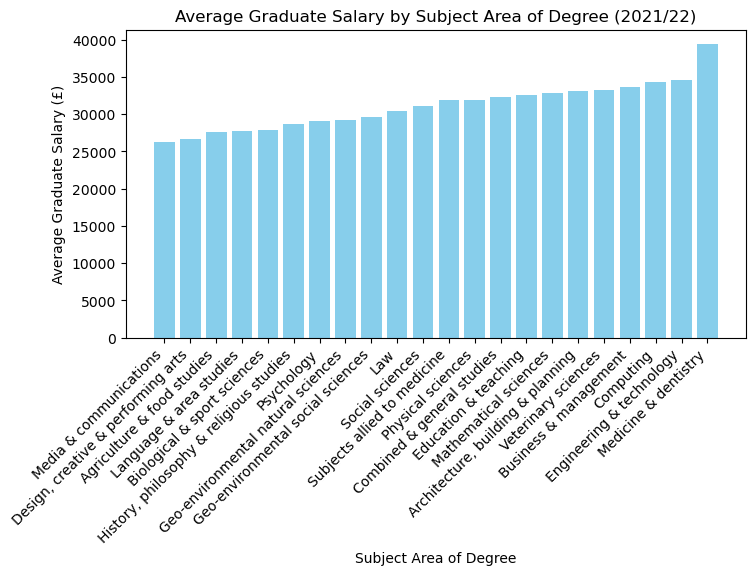

In [18]:
# Finding highest paid Subject Areas 2022

df_averagesalary22 = df_averagesalary.copy()

df_averagesalary22 = df_averagesalary22[df_averagesalary22['Academic year'] == '2021/22']
df_averagesalary22 = df_averagesalary22.sort_values(by='Average Salary')

plt.figure(figsize=(8, 4))
plt.bar(df_averagesalary22['Subject area of degree'], df_averagesalary22['Average Salary'], color='skyblue')
plt.xlabel('Subject Area of Degree')
plt.ylabel('Average Graduate Salary (£)')
plt.title('Average Graduate Salary by Subject Area of Degree (2021/22)')
plt.xticks(rotation=45,ha='right')
plt.show()

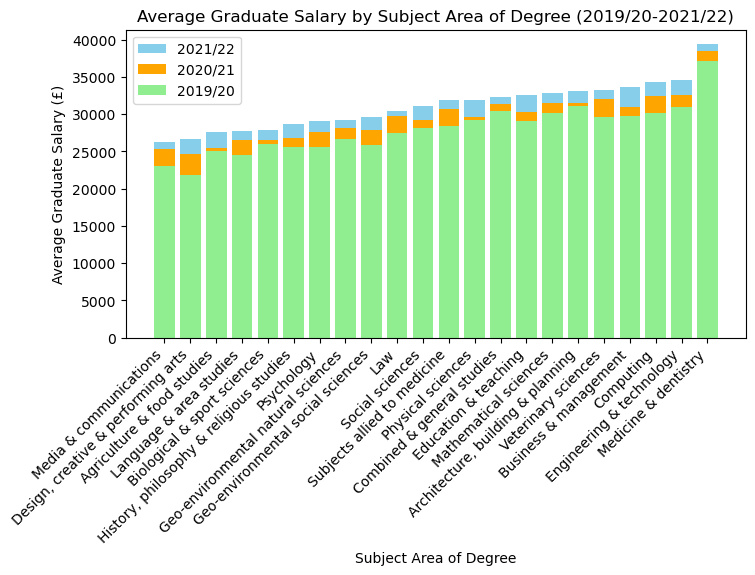

In [20]:
#Comparing average salaries 2019/20 - 2021/22


df_averagesalary21 = df_averagesalary.copy()

df_averagesalary21 = df_averagesalary21[df_averagesalary21['Academic year'] == '2020/21']
df_averagesalary21 = df_averagesalary21.sort_values(by='Average Salary')

df_averagesalary20 = df_averagesalary.copy()

df_averagesalary20 = df_averagesalary20[df_averagesalary20['Academic year'] == '2019/20']
df_averagesalary20 = df_averagesalary20.sort_values(by='Average Salary')
plt.figure(figsize=(8, 4))
plt.bar(df_averagesalary22['Subject area of degree'], df_averagesalary22['Average Salary'], color='skyblue',label='2021/22')
plt.bar(df_averagesalary21['Subject area of degree'], df_averagesalary21['Average Salary'], color='orange', label = '2020/21')
plt.bar(df_averagesalary20['Subject area of degree'], df_averagesalary20['Average Salary'], color='lightgreen', label = '2019/20')
plt.xlabel('Subject Area of Degree')
plt.ylabel('Average Graduate Salary (£)')
plt.title('Average Graduate Salary by Subject Area of Degree (2019/20-2021/22)')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.show()

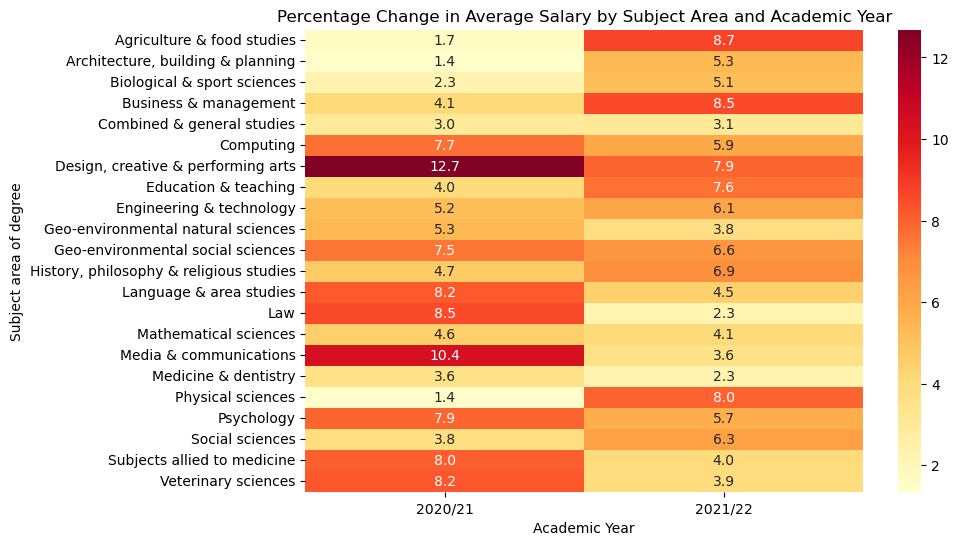

In [21]:
# observing salary +/- % 2020/21 - 2021/22

df_averagesalary_change = df_averagesalary.copy()

df_averagesalary_change['Percentage increase'] = df_averagesalary_change['Average Salary'].pct_change() * 100

df_averagesalary_change = df_averagesalary_change[(df_averagesalary_change['Academic year'] == '2020/21') | (df_averagesalary_change['Academic year'] == '2021/22')]
df_averagesalary_change = df_averagesalary_change.sort_values('Average Salary')

salary_heatmap = df_averagesalary_change.pivot(index="Subject area of degree", columns="Academic year", values="Percentage increase")

plt.figure(figsize=(9, 6))
sns.heatmap(salary_heatmap, annot=True, cmap="YlOrRd", fmt=".1f") #Using Yellow-Orange-Red color palette and rounding decimals to one place
plt.title("Percentage Change in Average Salary by Subject Area and Academic Year")
plt.xlabel("Academic Year")
plt.ylabel("Subject area of degree")
plt.show()

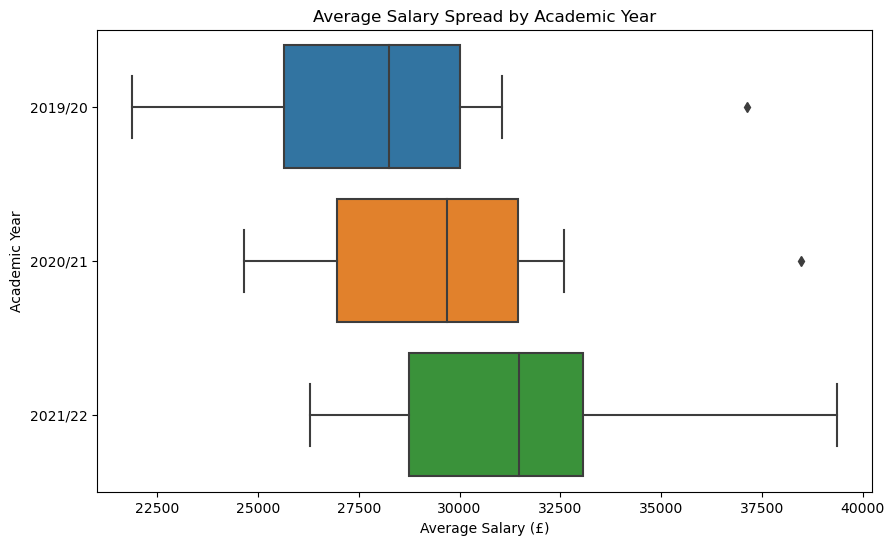

In [64]:
# box plot to examine spread of average salaries per subject across all academic years

df_averagesalary_spread = df_averagesalary.copy()

df_averagesalary_spread
plt.figure(figsize=(10, 6))
sns.boxplot(x='Average Salary', y='Academic year', data=df_averagesalary_spread, orient='h')
plt.title('Average Salary Spread by Academic Year')
plt.xlabel('Average Salary (£)')
plt.ylabel('Academic Year')
plt.show()

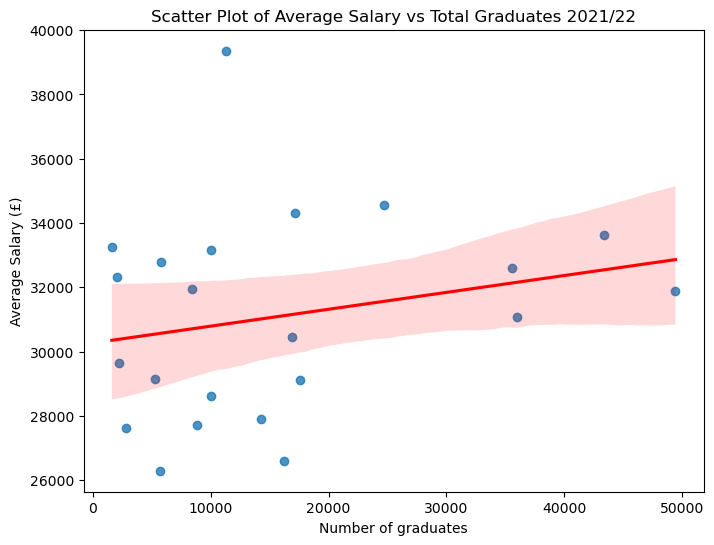

In [84]:
#creating copy of dftotalsubject2022 for further comparison

dftotalsubject2022_copy = dftotalsubject.copy()
dftotalsubject2022_copy = dftotalsubject2022_copy[dftotalsubject2022_copy['Academic year']=='2021/22']
dftotalsubject2022_copy = dftotalsubject2022_copy.groupby(['Subject area of degree','Academic year']).sum('Number')
dftotalsubject2022_copy = dftotalsubject2022_copy.sort_values(by='Number', ascending=False)
dftotalsubject2022_copy = dftotalsubject2022_copy.reset_index()

#merging with df_averagesalary22 to compare total graduates with average salary

df_subject_salary22 = pd.merge(dftotalsubject2022_copy, df_averagesalary22, on='Subject area of degree', how='inner')

#plotting scatter graph to compare total graduates with average salary
plt.figure(figsize=(8, 6))
sns.regplot(x='Number', y='Average Salary', data=df_subject_salary22, line_kws={"color":"red"})
plt.title('Scatter Plot of Average Salary vs Total Graduates 2021/22')
plt.xlabel('Number of graduates')
plt.ylabel('Average Salary (£)')
plt.show()